In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
songs = ak.from_parquet("/home/jpivarski/storage/million-song-dataset/data-zstd.parquet", lazy=True)

<BarContainer object of 12 artists>

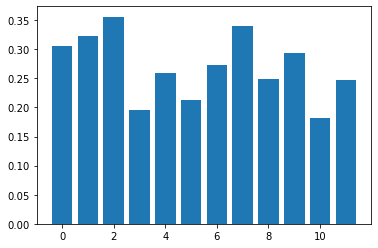

In [3]:
plt.bar(range(12), ak.mean(ak.mean(songs.analysis.segments.pitches[(songs.analysis.key_confidence > 0.9) & (songs.analysis.mode_confidence > 0.9) & (songs.analysis.mode == 1)], axis=1), axis=0))

In [4]:
key_shift = ak.Array([
    [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
    [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0],
    [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1],
    [ 3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2],
    [ 4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3],
    [ 5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4],
    [ 6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5],
    [ 7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6],
    [ 8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7],
    [ 9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8],
    [10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
    [11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
])

In [5]:
shift_for_song = key_shift[songs.analysis.key]

In [6]:
shifted_pitches = songs.analysis.segments.pitches[shift_for_song[:, np.newaxis]]

<BarContainer object of 12 artists>

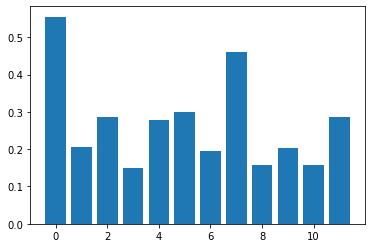

In [7]:
plt.bar(range(12), ak.mean(ak.mean(shifted_pitches[(songs.analysis.key_confidence > 0.9) & (songs.analysis.mode_confidence > 0.9) & (songs.analysis.mode == 1)], axis=1), axis=0))

In [8]:
loudest_pitches = ak.argmax(shifted_pitches, axis=-1)

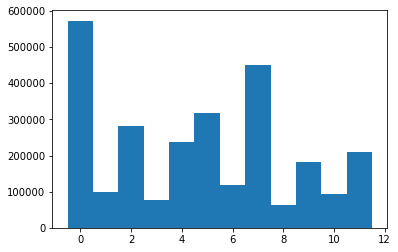

In [63]:
plt.hist(ak.flatten(loudest_pitches[(songs.analysis.key_confidence > 0.2) & (songs.analysis.mode_confidence > 0.5) & (songs.analysis.mode == 1)]), bins=12, range=(-0.5, 11.5));

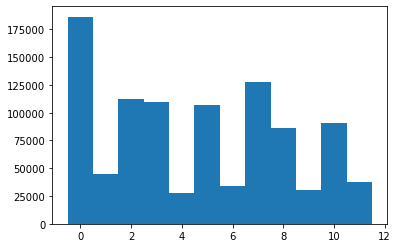

In [64]:
plt.hist(ak.flatten(loudest_pitches[(songs.analysis.key_confidence > 0.2) & (songs.analysis.mode_confidence > 0.5) & (songs.analysis.mode == 0)]), bins=12, range=(-0.5, 11.5));

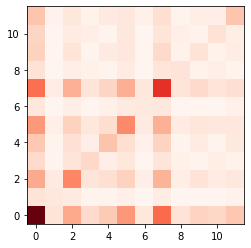

In [92]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [51]:
terms, counts = np.unique(np.asarray(ak.flatten(songs.metadata.artist_terms.term)), return_counts=True)
terms[np.argsort(counts)][-100:]

array(['rockabilly', 'pop rap', 'los angeles', 'british', 'urban',
       'new york', 'fusion', 'grunge', 'world music', 'death metal',
       'christian', 'progressive', 'cover', 'male', 'deep house', 'swing',
       'chanson', 'gospel', 'psychedelic rock', 'lounge', 'smooth jazz',
       'singer', 'industrial', 'california', '00s', 'trip hop',
       'country rock', 'ska', 'emo', 'progressive rock', 'funk soul',
       'piano', 'breakbeat', '60s', 'dance', 'female', 'trance', 'french',
       'beautiful', '70s', 'psychedelic', 'classical', 'oldies', 'dub',
       'new wave', 'soft rock', 'blues-rock', 'synthpop', 'chill-out',
       'heavy metal', 'folk rock', '90s', 'techno', 'germany', 'r&b',
       'electronica', 'female vocalist', 'ballad', 'hardcore', 'electro',
       'easy listening', 'disco', '80s', 'indie rock', 'house',
       'male vocalist', 'vocal', 'ambient', 'rap', 'downtempo',
       'singer-songwriter', 'classic', 'reggae', 'hard rock', 'latin',
       'metal', 'inst

In [27]:
is_metal = ak.any(songs.metadata.artist_terms.term == "metal", axis=-1)
songs.metadata[is_metal, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Gob', 'title': 'Face the Ashes'},
 {'artist_name': 'Tweeterfriendly Music', 'title': 'Drop of Rain'},
 {'artist_name': 'Blue Rodeo', 'title': 'Floating'},
 {'artist_name': 'Tesla', 'title': 'Caught In A Dream'},
 {'artist_name': 'The Dillinger Escape Plan',
  'title': 'Setting Fire to Sleeping Giants'},
 {'artist_name': 'Five Bolt Main', 'title': 'Made Like This (Live)'},
 {'artist_name': 'The Shangri-Las', 'title': 'Twist and Shout'},
 {'artist_name': 'Butthole Surfers', 'title': 'Barking Dogs (From "Piouhgd")'},
 {'artist_name': "Scarlet's Remains", 'title': 'Spin'},
 {'artist_name': 'The Suicide Machines', 'title': 'Burning In The Aftermath'},
 {'artist_name': 'The New York Dolls', 'title': 'Human Being'},
 {'artist_name': 'The Germs', 'title': 'Forming'},
 {'artist_name': 'The Berzerker', 'title': 'Deform (live)'},
 {'artist_name': 'NOFX', 'title': 'Stickin In My Eye'},
 {'artist_name': 'Van Halen', 'title': 'Panama (Remastered Album Version)'},
 {'artist_name': '

In [32]:
is_metal = ak.sum(songs.metadata.artist_terms.weight[songs.metadata.artist_terms.term == "metal"], axis=-1)
songs.metadata[is_metal > 0.8, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Daath', 'title': 'From The Blind (LP Version)'},
 {'artist_name': "Satan's Host", 'title': 'Metal from Hell...22nd Century'},
 {'artist_name': 'Muse', 'title': 'Bedroom Acoustics'},
 {'artist_name': "Guns N' Roses", 'title': 'Mama Kin'},
 {'artist_name': 'Daath', 'title': 'Above Lucium (LP Version)'},
 {'artist_name': 'Muse', 'title': 'Stockholm Syndrome'},
 {'artist_name': 'Muse', 'title': 'Exogenesis: Symphony Part 1 [Overture]'},
 {'artist_name': 'Mindless Self Indulgence',
  'title': 'Never Wanted to Dance (Live In London)'},
 {'artist_name': 'Between The Buried And Me',
  'title': 'Foam Born (A) The Backtrack (Album Version)'},
 {'artist_name': 'The Lord Weird Slough Feg', 'title': 'Beast In the Broch'},
 {'artist_name': 'Between The Buried And Me',
  'title': 'Geek USA (Album Version)'},
 {'artist_name': "Guns N' Roses", 'title': 'Locomotive (Complicity)'},
 {'artist_name': 'D.O.W.N.', 'title': "Hustlin'"},
 {'artist_name': 'Bon Jovi', 'title': 'I Love This Town

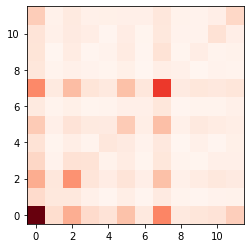

In [74]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2) & (is_metal > 0.8)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2) & (is_metal > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [34]:
is_folk = ak.sum(songs.metadata.artist_terms.weight[songs.metadata.artist_terms.term == "folk"], axis=-1)
songs.metadata[is_folk > 0.8, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Loudon Wainwright III', 'title': 'Human Cannonball'},
 {'artist_name': 'Glen Campbell', 'title': "I'm Gone This Time"},
 {'artist_name': 'Ellen McIlwaine', 'title': 'Spontanous Combustion'},
 {'artist_name': 'Hem', 'title': 'Have Yourself A Merry Little Christmas'},
 {'artist_name': 'Brian Keane', 'title': 'Battle Of The Rosebud / Cries'},
 {'artist_name': 'Carl Belew', 'title': "Love's Been Good To Me"},
 {'artist_name': 'Carlos Nuñez', 'title': 'Quiero Ir Ao Mar'},
 {'artist_name': 'Lisa Lynne', 'title': 'Isla del Luna'},
 {'artist_name': 'Lisa Lynne', 'title': 'Lake Of Dreams'},
 {'artist_name': 'Luar Na Lubre', 'title': 'Terra'},
 {'artist_name': 'Olov Johansson_ Catriona Mckay', 'title': 'Rain / Ekoln'},
 {'artist_name': 'Claire Hamill',
  'title': "If You'd Only Talk To Me (Bonus Track)"},
 {'artist_name': 'Claire Hamill', 'title': 'To The Stars'},
 {'artist_name': 'Bröderna Djup', 'title': 'Råskevärsrock'},
 {'artist_name': 'Steve Riley & The Mamou Playboys',
 

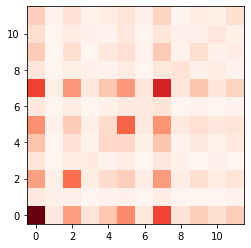

In [75]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2) & (is_folk > 0.8)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2) & (is_folk > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [36]:
is_pop = ak.sum(songs.metadata.artist_terms.weight[songs.metadata.artist_terms.term == "pop"], axis=-1)
songs.metadata[is_pop > 0.8, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Gob', 'title': 'Face the Ashes'},
 {'artist_name': 'Wayne Watson', 'title': 'The Urgency (LP Version)'},
 {'artist_name': 'The Shangri-Las', 'title': 'Twist and Shout'},
 {'artist_name': 'Chris Rea', 'title': 'Driving Home For Christmas'},
 {'artist_name': 'Perrey And Kingsley', 'title': 'Spooks In Space'},
 {'artist_name': 'Black Eyed Peas', 'title': "Let's Get It Started"},
 {'artist_name': 'Julien Clerc', 'title': 'This Melody (Live)'},
 {'artist_name': 'Glen Campbell', 'title': "I'm Gone This Time"},
 {'artist_name': 'Savage Garden', 'title': 'You Can Still Be Free'},
 {'artist_name': 'Martina McBride', 'title': "I Can't Stop Loving You"},
 {'artist_name': 'Miguel Gallardo', 'title': 'Eternamente Amame'},
 {'artist_name': 'Eddie', 'title': 'No Control'},
 {'artist_name': 'Shelley Fabares', 'title': 'Johnny Loves Me (LP Version)'},
 {'artist_name': 'Norrie Paramor', 'title': 'Dearly Beloved'},
 {'artist_name': 'Brixx', 'title': '7 Miles'},
 {'artist_name': 'Heaven 

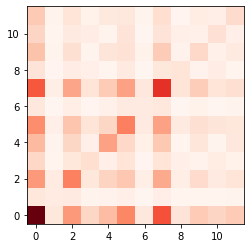

In [76]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2) & (is_pop > 0.8)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2) & (is_pop > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [38]:
is_rock = ak.sum(songs.metadata.artist_terms.weight[songs.metadata.artist_terms.term == "rock"], axis=-1)
songs.metadata[is_rock > 0.8, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Adam Ant', 'title': 'Something Girls'},
 {'artist_name': 'Gob', 'title': 'Face the Ashes'},
 {'artist_name': 'Planet P Project', 'title': 'Pink World'},
 {'artist_name': 'JennyAnyKind', 'title': 'Young Boy Blues'},
 {'artist_name': 'Tesla', 'title': 'Caught In A Dream'},
 {'artist_name': 'SUE THOMPSON', 'title': 'James (Hold The Ladder Steady)'},
 {'artist_name': 'The Shangri-Las', 'title': 'Twist and Shout'},
 {'artist_name': "Scarlet's Remains", 'title': 'Spin'},
 {'artist_name': 'The Rolling Stones',
  'title': 'Angie (1993 Digital Remaster)'},
 {'artist_name': 'R.L. Burnside', 'title': 'Glory Be'},
 {'artist_name': 'John Hammond', 'title': "I Can't Be Satisfied"},
 {'artist_name': 'Casiotone For The Painfully Alone',
  'title': 'Nashville Parthenon'},
 {'artist_name': 'The New York Dolls', 'title': 'Human Being'},
 {'artist_name': 'The Germs', 'title': 'Forming'},
 {'artist_name': 'Chris Rea', 'title': 'Driving Home For Christmas'},
 {'artist_name': 'Eurythmics', 

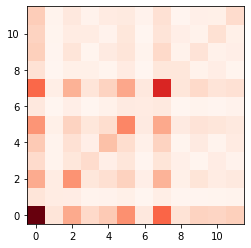

In [77]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2) & (is_rock > 0.8)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2) & (is_rock > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [40]:
is_jazz = ak.sum(songs.metadata.artist_terms.weight[songs.metadata.artist_terms.term == "jazz"], axis=-1)
songs.metadata[is_jazz > 0.8, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Bob Azzam', 'title': 'Auguri Cha Cha'},
 {'artist_name': 'Richard Souther', 'title': 'High Tide'},
 {'artist_name': 'Elena', 'title': 'Setanta matins'},
 {'artist_name': 'Willie Bobo', 'title': 'Spanish Grease'},
 {'artist_name': 'Terry Callier', 'title': 'Do You Finally Need A Friend'},
 {'artist_name': 'Jacob Young', 'title': 'In A Subtle Way'},
 {'artist_name': 'John Hammond', 'title': "I Can't Be Satisfied"},
 {'artist_name': 'Eliane Elias', 'title': 'The More I See You'},
 {'artist_name': 'Perrey And Kingsley', 'title': 'Spooks In Space'},
 {'artist_name': 'Glen Campbell', 'title': "I'm Gone This Time"},
 {'artist_name': 'Kai Winding', 'title': 'Mangos'},
 {'artist_name': 'Sonny Simmons', 'title': 'A Distant Voice'},
 {'artist_name': 'Ellen McIlwaine', 'title': 'Spontanous Combustion'},
 {'artist_name': 'Vince Guaraldi / Bola Sete', 'title': 'Choro'},
 {'artist_name': 'Maurice Chevalier', 'title': 'Ma Louise'},
 {'artist_name': 'Richard Burton', 'title': 'I See T

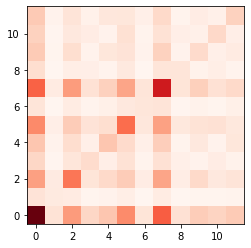

In [78]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2) & (is_jazz > 0.8)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2) & (is_jazz > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [42]:
is_world = ak.sum(songs.metadata.artist_terms.weight[songs.metadata.artist_terms.term == "world"], axis=-1)
songs.metadata[is_world > 0.8, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Glen Campbell', 'title': "I'm Gone This Time"},
 {'artist_name': 'Ellen McIlwaine', 'title': 'Spontanous Combustion'},
 {'artist_name': 'Brian Keane', 'title': 'Battle Of The Rosebud / Cries'},
 {'artist_name': 'Carl Belew', 'title': "Love's Been Good To Me"},
 {'artist_name': 'Carlos Nuñez', 'title': 'Quiero Ir Ao Mar'},
 {'artist_name': 'Java', 'title': "Don't Phunk With My Heart"},
 {'artist_name': 'Luar Na Lubre', 'title': 'Terra'},
 {'artist_name': 'Olov Johansson_ Catriona Mckay', 'title': 'Rain / Ekoln'},
 {'artist_name': 'Claire Hamill',
  'title': "If You'd Only Talk To Me (Bonus Track)"},
 {'artist_name': 'Andy Russell', 'title': 'I Love You And You Love Me'},
 {'artist_name': 'Claire Hamill', 'title': 'To The Stars'},
 {'artist_name': 'Jerry Reed', 'title': "When You're Hot_ You're Hot"},
 {'artist_name': 'Pepe Kalle', 'title': 'Roger Milla (Stadium Mix)'},
 {'artist_name': 'Chango Spasiuk', 'title': 'De Bombacha Y Alpargatas'},
 {'artist_name': 'Ty Herndon

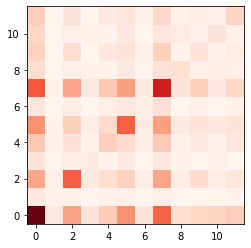

In [79]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2) & (is_world > 0.8)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2) & (is_world > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [44]:
is_blues = ak.sum(songs.metadata.artist_terms.weight[songs.metadata.artist_terms.term == "blues"], axis=-1)
songs.metadata[is_blues > 0.8, ["artist_name", "title"]][:20].tolist()

[{'artist_name': 'Jimmy Wakely', 'title': 'Broken-Down Merry-Go-Round'},
 {'artist_name': 'Alice Stuart', 'title': 'Kassie Jones'},
 {'artist_name': 'Faye Adams', 'title': 'Crazy Mixed Up World'},
 {'artist_name': 'Terry Callier', 'title': 'Do You Finally Need A Friend'},
 {'artist_name': 'The Shangri-Las', 'title': 'Twist and Shout'},
 {'artist_name': 'The Rolling Stones',
  'title': 'Angie (1993 Digital Remaster)'},
 {'artist_name': 'R.L. Burnside', 'title': 'Glory Be'},
 {'artist_name': 'Stevie Ray Vaughan', 'title': 'Crossfire'},
 {'artist_name': 'John Hammond', 'title': "I Can't Be Satisfied"},
 {'artist_name': 'Chris Rea', 'title': 'Driving Home For Christmas'},
 {'artist_name': 'Glen Campbell', 'title': "I'm Gone This Time"},
 {'artist_name': 'Ellen McIlwaine', 'title': 'Spontanous Combustion'},
 {'artist_name': 'Organized Konfusion', 'title': 'Hate'},
 {'artist_name': 'Tyrone Davis', 'title': "Cheatin' In The Next Room"},
 {'artist_name': 'Hot Tuna', 'title': 'Candy Man'},
 {'a

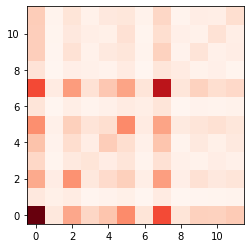

In [80]:
before = loudest_pitches[:, :-10]
after = loudest_pitches[:, 10:]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(before[(songs.analysis.key_confidence > 0.2) & (is_blues > 0.8)])),
    np.asarray(ak.flatten(after[(songs.analysis.key_confidence > 0.2) & (is_blues > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
)
ax.set_aspect(1)

In [46]:
sorted_pitches = ak.argsort(shifted_pitches, axis=-1)
sorted_pitches

<Array [[[6, 4, 1, 0, 5, ... 11, 2, 7, 5, 10]]] type='10000 * var * var * int64'>

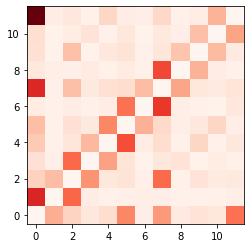

In [89]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

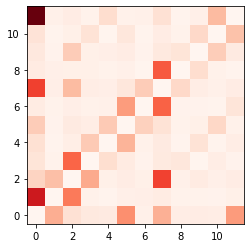

In [81]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2) & (is_metal > 0.8)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2) & (is_metal > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

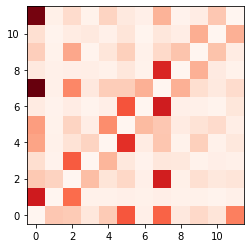

In [82]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2) & (is_folk > 0.8)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2) & (is_folk > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

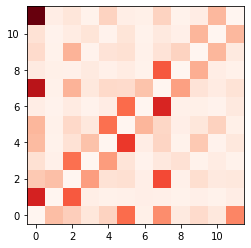

In [83]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2) & (is_pop > 0.8)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2) & (is_pop > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

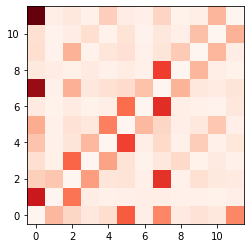

In [84]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2) & (is_rock > 0.8)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2) & (is_rock > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

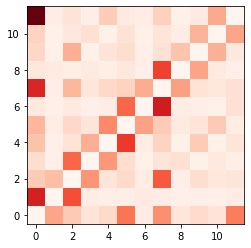

In [85]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2) & (is_jazz > 0.8)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2) & (is_jazz > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

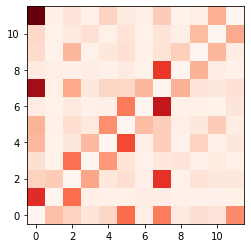

In [86]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2) & (is_blues > 0.8)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2) & (is_blues > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

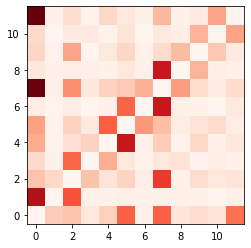

In [87]:
second_loudest = sorted_pitches[:, :, -2]
first_loudest = sorted_pitches[:, :, -1]

fig, ax = plt.subplots(1, 1)
ax.hist2d(
    np.asarray(ak.flatten(first_loudest[(songs.analysis.key_confidence > 0.2) & (is_world > 0.8)])),
    np.asarray(ak.flatten(second_loudest[(songs.analysis.key_confidence > 0.2) & (is_world > 0.8)])),
    bins=(12, 12),
    range=((-0.5, 11.5), (-0.5, 11.5)),
    cmap="Reds",
);
ax.set_aspect(1)

In [96]:
ionian     = ak.Array([True, False, True, False, True, True, False, True, False, True, False, True])
dorian     = ak.Array([True, False, True, True, False, True, False, True, False, True, True, False])
phrygian   = ak.Array([True, True, False, True, False, True, False, True, True, False, True, False])
lydian     = ak.Array([True, False, True, False, True, False, True, True, False, True, False, True])
mixolydian = ak.Array([True, False, True, False, True, True, False, True, False, True, True, False])
aeolian    = ak.Array([True, False, True, True, False, True, False, True, True, False, True, False])
locrian    = ak.Array([True, True, False, True, False, True, True, False, True, False, True, False])

In [133]:
print("ionian    ", np.nonzero(np.asarray(ionian))[0])
print("dorian    ", np.nonzero(np.asarray(dorian))[0])
print("phrygian  ", np.nonzero(np.asarray(phrygian))[0])
print("lydian    ", np.nonzero(np.asarray(lydian))[0])
print("mixolydian", np.nonzero(np.asarray(mixolydian))[0])
print("aeolian   ", np.nonzero(np.asarray(aeolian))[0])
print("locrian   ", np.nonzero(np.asarray(locrian))[0])

ionian     [ 0  2  4  5  7  9 11]
dorian     [ 0  2  3  5  7  9 10]
phrygian   [ 0  1  3  5  7  8 10]
lydian     [ 0  2  4  6  7  9 11]
mixolydian [ 0  2  4  5  7  9 10]
aeolian    [ 0  2  3  5  7  8 10]
locrian    [ 0  1  3  5  6  8 10]


In [161]:
is_major = (songs.analysis.key_confidence > 0.2) & (songs.analysis.mode_confidence > 0.5) & (songs.analysis.mode == 1)
is_minor = (songs.analysis.key_confidence > 0.2) & (songs.analysis.mode_confidence > 0.5) & (songs.analysis.mode == 0)

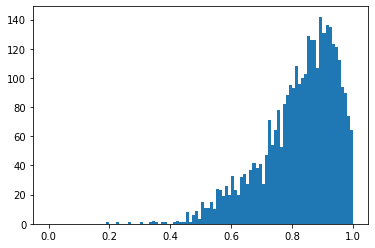

In [167]:
plt.hist(ak.mean(ak.mean(shifted_pitches[:, :, ionian], axis=-1) > ak.mean(shifted_pitches[:, :, ~ionian], axis=-1), axis=-1)[is_major], bins=100, range=(0, 1));

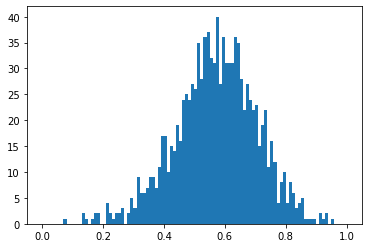

In [168]:
plt.hist(ak.mean(ak.mean(shifted_pitches[:, :, ionian], axis=-1) > ak.mean(shifted_pitches[:, :, ~ionian], axis=-1), axis=-1)[is_minor], bins=100, range=(0, 1));

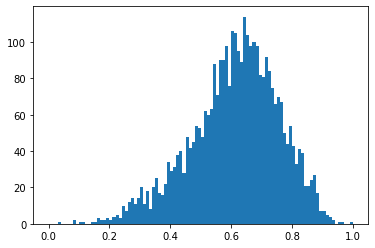

In [169]:
plt.hist(ak.mean(ak.mean(shifted_pitches[:, :, aeolian], axis=-1) > ak.mean(shifted_pitches[:, :, ~aeolian], axis=-1), axis=-1)[is_major], bins=100, range=(0, 1));

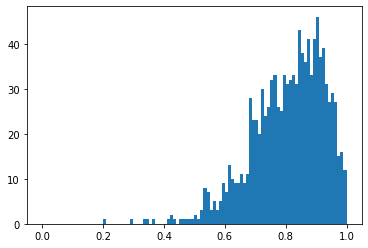

In [170]:
plt.hist(ak.mean(ak.mean(shifted_pitches[:, :, aeolian], axis=-1) > ak.mean(shifted_pitches[:, :, ~aeolian], axis=-1), axis=-1)[is_minor], bins=100, range=(0, 1));

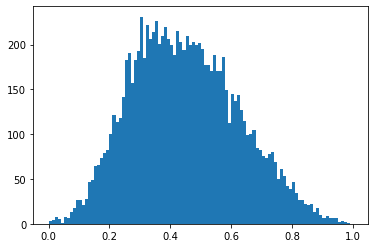

In [171]:
plt.hist(ak.mean(ak.mean(shifted_pitches[:, :, locrian], axis=-1) > ak.mean(shifted_pitches[:, :, ~locrian], axis=-1), axis=-1), bins=100, range=(0, 1));

In [185]:
mixolydianness = ak.mean(ak.mean(shifted_pitches[:, :, mixolydian], axis=-1) > ak.mean(shifted_pitches[:, :, ~mixolydian], axis=-1), axis=-1)
songs.metadata[["artist_name", "title"]][ak.argsort(mixolydianness)][-20:].tolist()

[{'artist_name': 'Phil Collins', 'title': 'Please Come Out Tonight'},
 {'artist_name': 'Sharon Burch', 'title': 'Newborn Blessing (World)'},
 {'artist_name': 'The Field Mice', 'title': 'Below The Stars'},
 {'artist_name': 'Funeral For A Friend', 'title': 'Building'},
 {'artist_name': 'Javier Navarrete', 'title': 'Midnight Swim'},
 {'artist_name': 'Mariano Yanani', 'title': 'Why Should I Cry For You'},
 {'artist_name': 'Mariano Yanani',
  'title': "I Still Haven't Found What I'm Looking For"},
 {'artist_name': 'Mariano Yanani',
  'title': "Stuck In A Moment You can't Get Out Of"},
 {'artist_name': "O'2L", 'title': 'Little Edith'},
 {'artist_name': 'Séamus Egan',
  'title': 'Poultry in the Parlour / Rolling the Ryegrass'},
 {'artist_name': 'Solomon',
  'title': '25 Variations And Fugue On A Theme By G.F. Handel For Piano_ Op. 24: Variation XVII'},
 {'artist_name': 'Bill Douglas', 'title': 'Infant Dreams'},
 {'artist_name': 'Marcelo Radulovich', 'title': 'Non-Stop Floater'},
 {'artist_nam

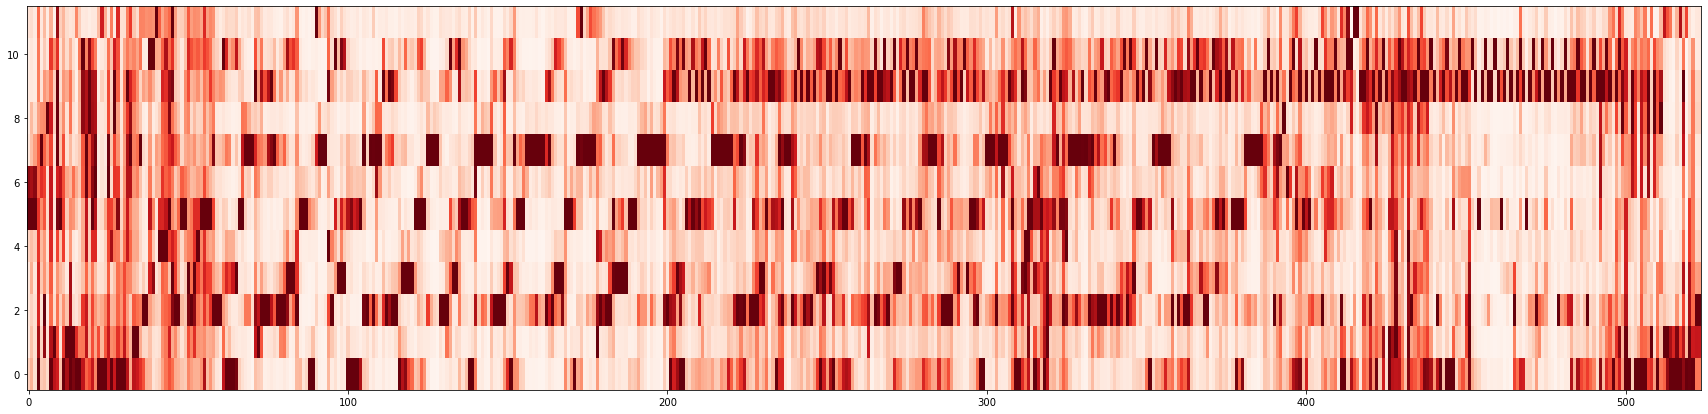

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
ax.imshow(np.asarray(songs.analysis.segments.pitches[(songs.metadata.artist_name == "Nine Inch Nails") & (songs.metadata.title == "The Frail")][0]).T, aspect=10, interpolation="nearest", cmap="Reds", origin="lower")